# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [35]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode
import math

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [14]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length'] = df['title'].astype(str).apply(len)
print(df['title_length'])

0      24
1      13
2      22
3      15
4      12
       ..
974     7
975    27
976    47
977    11
978    11
Name: title_length, Length: 979, dtype: int64


In [15]:
# Calcula media, mediana y moda de la columna 'title_length'

media = round(df['title_length'].mean(), 2)
print(f"Media del Largo de los Títulos: {media}")

mediana = round(df['title_length'].median(), 2)
print(f"Mediana del Largo de los Títulos: {mediana}")

moda = mode(df['title_length'], keepdims=True).mode[0]
print(f"Moda del Largo de los Títulos: {moda}")

Media del Largo de los Títulos: 15.48
Mediana del Largo de los Títulos: 14.0
Moda del Largo de los Títulos: 12


In [16]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'

rango = round(df['title_length'].max() - df['title_length'].min(), 2)
print(f"Rango del Largo de los Títulos: {rango}")

varianza = round(df['title_length'].var(), 2)
print(f"Varianza del Largo de los Títulos: {varianza}")

desviacion_estandar = round(df['title_length'].std(), 2)
print(f"Desviación Estándar del Largo de los Títulos: {desviacion_estandar}")

Rango del Largo de los Títulos: 67
Varianza del Largo de los Títulos: 72.11
Desviación Estándar del Largo de los Títulos: 8.49


In [17]:
# Calcula asimetría y curtosis de la columna 'title_length'

asimetria = round(skew(df['title_length']), 2)
print(f"Asimetría del Largo de los Títulos:, {asimetria}")

curtosis = round(kurtosis(df['title_length']), 2)
print(f"Curtosis del Largo de los Títulos:, {curtosis}")

Asimetría del Largo de los Títulos:, 1.52
Curtosis del Largo de los Títulos:, 3.79


In [18]:
# Imprime el título más corto y el título más largo según su longitud

mas_corto = df['title_length'].idxmin()
titulo_mas_corto = df.loc[mas_corto, 'title']
print(titulo_mas_corto)

mas_largo = df['title_length'].idxmax()
titulo_mas_largo = df.loc[mas_largo, 'title']
print(titulo_mas_largo)

M
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


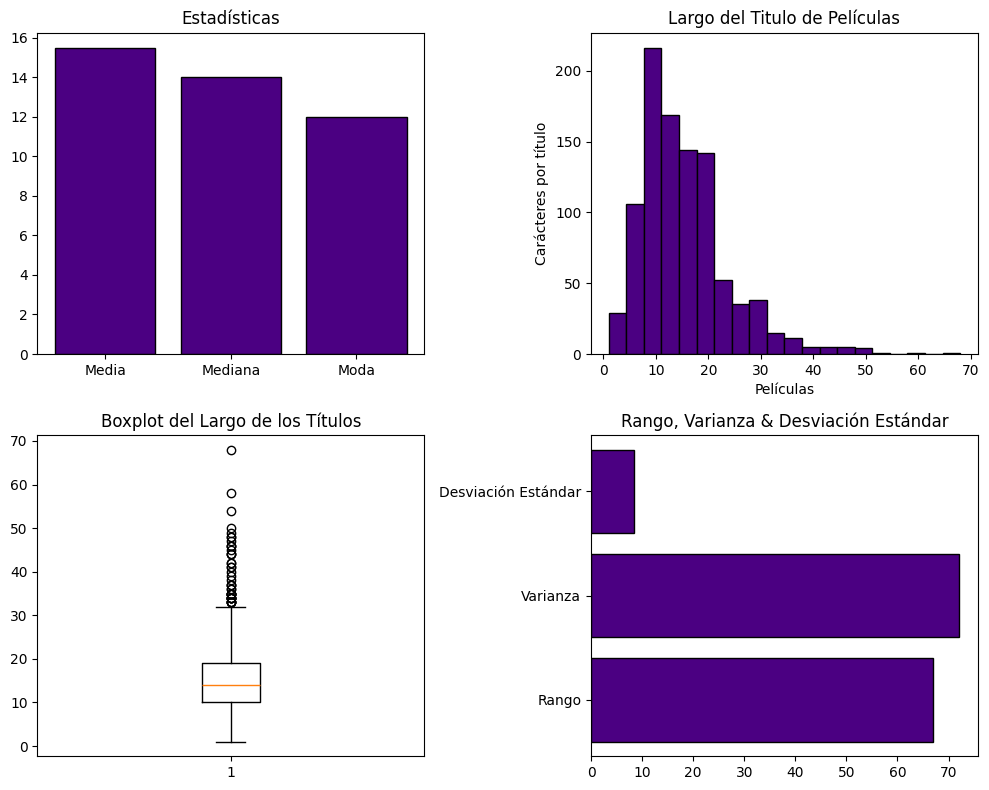

In [19]:
# grafica tus resultados

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Gráfico de barras de Media, Mediana y Moda:

etiquetas = ['Media', 'Mediana', 'Moda']
valores = [media, mediana, moda]
axes [0,0].bar(etiquetas, valores, color='indigo', edgecolor='black')
axes [0,0].set_title("Estadísticas")

# Historiograma del Largo del Título de las Películas:

axes [0,1].hist(df['title_length'], bins=20, color='indigo', edgecolor='black')
axes [0,1].set_title("Largo del Titulo de Películas")
axes [0,1].set_xlabel("Películas")
axes [0,1].set_ylabel("Carácteres por título")

# Boxplot del Largo de los Títulos:.

axes [1,0].boxplot(df['title_length'])
axes [1,0].set_title("Boxplot del Largo de los Títulos")


# Barras Horizontales con el Rango, Varianza y Desviación Estándar:

etiquetas_2 = ['Rango', 'Varianza', 'Desviación Estándar']
valores_2 = [rango, varianza, desviacion_estandar]

axes [1,1].barh(etiquetas_2, valores_2, color='indigo', edgecolor='black')
axes [1,1].set_title("Rango, Varianza & Desviación Estándar")

plt.tight_layout()
plt.show()
            

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [26]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]

valores_nuevos = df['title_length'].sample(5).tolist()
print(valores_nuevos)


[16, 21, 10, 24, 24]


In [29]:
# Calcula la media de los 5 valores

media_nueva = round(sum(valores_nuevos)/len(valores_nuevos), 2)
print(media_nueva)


19.0


In [30]:
# Calcula las diferencias al cuadrado con respecto a la media

diferencias_cuadrado = [(x - media_nueva) ** 2 for x in valores_nuevos]
print(diferencias_cuadrado)

[9.0, 4.0, 81.0, 25.0, 25.0]


In [36]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación

varianza_nueva = round(sum(diferencias_cuadrado)/len(diferencias_cuadrado), 2)
print(f"Nueva Varianza: {varianza_nueva}")

desviacion_nueva = round(math.sqrt(varianza_nueva), 2)
print(f"Nueva Desviación: {desviacion_nueva}")

Nueva Varianza: 28.8
Nueva Desviación: 5.37
